# Clustering models

In [ ]:
# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset to python environment
data=pd.read_csv('C:/Users/hp/Downloads/Wine_clust.csv')

In [3]:
# EDA
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# checking missing values (no missing data)
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


# K-means clustering

In [6]:
from sklearn.cluster import KMeans

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


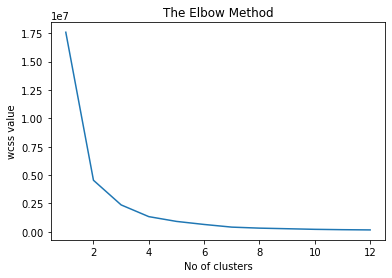

In [7]:
wcss = []
for i in range (1,13):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('wcss value')
plt.show()

In [8]:
data=data.iloc[:,[3,4]].values

In [9]:
# taking no of clusters as 3
kmeans = KMeans(n_clusters=3,init='k-means++',random_state = 42)
y_kmeans= kmeans.fit_predict(data)

In [10]:
y_kmeans

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0,
       2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 1, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1,
       1, 0])

In [ ]:
# plotting the graph

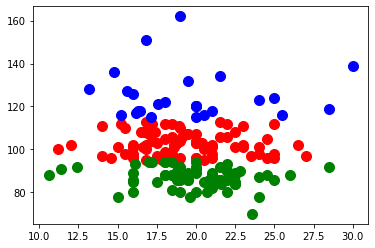

In [11]:
plt.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=100,c='red',label = 'cluster1')
plt.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=100,c='blue',label = 'cluster2')
plt.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=100,c='green',label = 'cluster3')
#plt.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=100,c='yellow',label = 'cluster4')

# Heirarchical Clustering

In [12]:
import scipy.cluster.hierarchy as sch

In [26]:
# plotting dendrogram

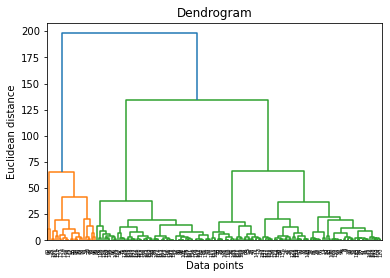

In [13]:
dendrogram = sch.dendrogram(sch.linkage(data,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()

# Agglomerative clustering

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(data)

In [16]:
y_hc

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 1, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1,
       1, 0], dtype=int64)

# Silhouette Score

## score from hc

In [17]:
from sklearn.metrics import silhouette_score
sil_avg = silhouette_score(data,y_hc)
print(sil_avg)

0.47030670696825333


## score from Kmeans

In [27]:
sil_avg1 = silhouette_score(data,y_kmeans)

In [28]:
sil_avg1

0.47874464666294486

# PCA

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=0.97)
pca.fit(data)

PCA(n_components=0.97)

In [20]:
x_pca = pca.transform(data)
x_pca.shape

(178, 2)

In [22]:
np.cumsum(pca.explained_variance_ratio_)

array([0.94854193, 1.        ])

In [23]:
pca.components_

array([[-0.02059894,  0.99978782],
       [ 0.99978782,  0.02059894]])